<a href="https://colab.research.google.com/github/EddyGiusepe/Cyber_Security_1/blob/main/CyberSecurity_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Cyber Security -- Kaggle</h2> 


**Data Scientist Jr.:**  Dr.Eddy Giusepe Chirinos Isidro


Neste Script reproduziremos e exploraremos ataques cibernéticos. Basicamente temos Dados onde no último mês, alguns eventos de SEGURANÇA CIBERNÉTICA com durações e padrões diferentes foram registrados.


Nesse sentido, podemos derivar:

* Endereço de IP de destino mais direcionado,
* A maioria das portas lógicas atacadas,
* Tipo de ataque mais frequente/comum,
* Hora diferente do dia (odd (estranho), horas, dia ou noite),
* Encontrar um padrão.

Este Script está baseado nos seguintes links:

* [Cyber Security](https://www.kaggle.com/iamranjann/exploring-attacks-cybersec/notebook).
* [Cyber Security no YouTube](https://www.youtube.com/watch?v=7q8XQSUeUPc&list=PLlUZLZydkS79ctBEkAqeNj5k0RNvAvvD7&index=1).

## Importamos as nossas bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

## Carregamos nossos Dados de Cyber Security

In [2]:
df = pd.read_csv("/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/3_Data_Science_Augusto_Eddy/Attacks CyberSecurity Kaggle/Cybersecurity_attacks.csv")


In [3]:
df.shape

(178031, 11)

In [4]:
# Observamos que as nossas colunas são:

df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [5]:
df.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


## Análise, limpeza e exploração de nossos Dados

In [6]:
# Na coluna "time" aplicamos o método --> split(), para separar em tempo de início e tempo final

df[['Start time', 'Last time']] = df['Time'].str.split('-', expand=True)

df.sample(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
176581,Fuzzers,BGP,tcp,175.45.176.1,78996,149.171.126.11,179,BGP Open: Params: Long Parameter Fields (https...,NaN,.,1424228438-1424228439,1424228438,1424228439
142563,Reconnaissance,HTTP,tcp,175.45.176.2,2182,149.171.126.15,80,Netscape Server WP Tag Directory Index Variant...,CVE 2000-0236 (http://cve.mitre.org/cgi-bin/cv...,.,1424253505-1424253505,1424253505,1424253505
6610,Fuzzers,OSPF,unas,175.45.176.1,0,149.171.126.12,0,Fuzzer: OSPF Database Description Packet: Inva...,-,.,1421930752-1421930752,1421930752,1421930752
76,Generic,IXIA,tcp,175.45.176.2,8037,149.171.126.10,80,Adobe_Shockwave_Player_DIR_Files_PAMI_Chunk_Co...,CVE 2010-1292 (http://cve.mitre.org/cgi-bin/cv...,.,1421927485-1421927485,1421927485,1421927485
83676,Fuzzers,OSPF,unas,175.45.176.1,0,149.171.126.10,0,Fuzzer: OSPF Simple Password Auth: Bad Strings...,NaN,.,1424237380-1424237380,1424237380,1424237380
9422,Reconnaissance,SunRPC Portmapper (UDP) UDP Service,udp,175.45.176.3,24837,149.171.126.11,111,SunRPC UDP Portmapper GETPORT Request (rpcnfsv...,-,.,1421931800-1421931800,1421931800,1421931800


In [7]:
# Percebemos que temos uma coluna com nome --> "."
# Vejamos nesta coluna se temos algum valor (numérico o categórico), assim:

df['.'].unique()


array(['.'], dtype=object)

In [8]:
# Seguidamente eliminamos colunas que não são uteis para nossa análise
# Dropamos colunas e fazemos uma cópia na memória do objeto

df = df.drop(['.', 'Time'], axis=1) 

df.sample(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
2850,Reconnaissance,SunRPC Portmapper (TCP) UDP Service,tcp,175.45.176.1,59803,149.171.126.12,111,SunRPC TCP Portmapper GETPORT Request (nfs_acl...,-,1421928872,1421928873
84630,Exploits,Miscellaneous,unas,175.45.176.1,0,149.171.126.10,0,Microsoft Windows Media Services MMS Funnel Na...,CVE 2010-0478 (http://cve.mitre.org/cgi-bin/cv...,1424237394,1424237394
5535,Backdoors,,3pc,175.45.176.1,0,149.171.126.12,0,HP Performance Manager Tomcat Bypass (https://...,CVE 2009-3548 (http://cve.mitre.org/cgi-bin/cv...,1421930674,1421930674
38888,Fuzzers,SMB,udp,175.45.176.1,137,149.171.126.15,137,BGP Update: Random Path Attributes (https://st...,NaN,1424226458,1424226493
19018,DoS,ICMP,pup,175.45.176.0,0,149.171.126.13,0,ICMP Echo Request Modem Hangup (++ATH0) (https...,CVE 1999-1228 (http://cve.mitre.org/cgi-bin/cv...,1424223147,1424223147
109700,DoS,Miscellaneous,unas,175.45.176.1,0,149.171.126.17,0,Doms Httpd Denial of Service (https://strikece...,OSVDB 84104 (http://www.osvdb.org/84104)CVSS-M...,1424244421,1424244421


In [9]:
df.shape

(178031, 11)

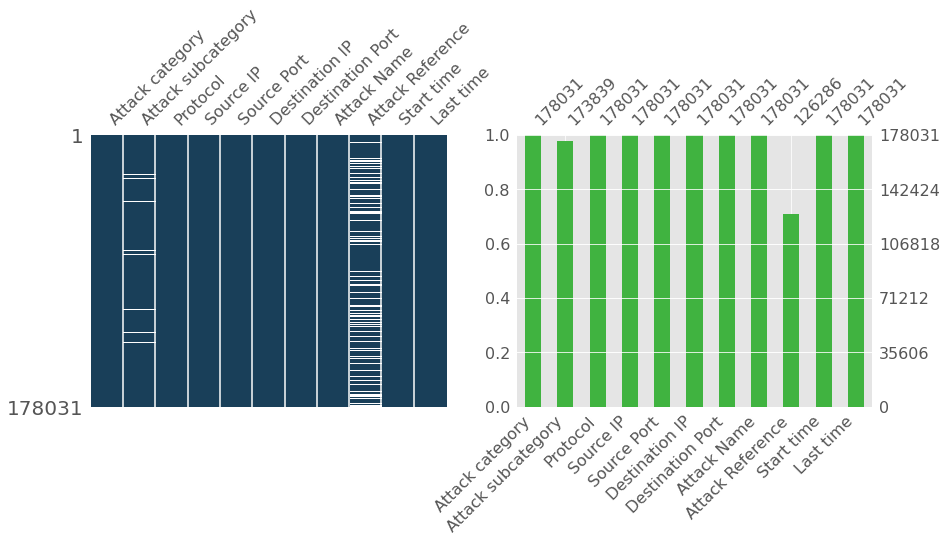

In [10]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [11]:
# Vejamos os valores MISSING que temos em nossos Dados

df.isna().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [12]:
# Também

df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [13]:
# Aqui vamos a preecher os valores MISSING com "Not Registered"

df["Attack subcategory"] = df["Attack subcategory"].fillna("Not Registered")

In [14]:
# Visualizamos nossos Dados e verificamos a troca de NaN --> "Not Registered"

df.sample(100)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
1011,Exploits,SMB,tcp,175.45.176.1,59183,149.171.126.11,139,Samba nmbd NetServerInfo1 Server Comment Buffe...,CVE 2014-3560 (http://cve.mitre.org/cgi-bin/cv...,1421927964,1421927966
5419,Exploits,Miscellaneous Batch,dcn,175.45.176.1,0,149.171.126.12,0,HP Power Manager Web Server Stack Overflow (ht...,CVE 2004-1612 (http://cve.mitre.org/cgi-bin/cv...,1421930667,1421930667
163240,Reconnaissance,ICMP,unas,175.45.176.2,0,149.171.126.17,0,IP Options: Loose Source Route (IP Option 3) (...,NaN,1424258860,1424258860
35831,Generic,IXIA,udp,175.45.176.0,47439,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424225168,1424225168
164523,Exploits,Miscellaneous,unas,175.45.176.2,0,149.171.126.17,0,Airlive IP Camera URI Handling Denial of Servi...,CVE 2013-3691 (http://cve.mitre.org/cgi-bin/cv...,1424258878,1424258878
...,...,...,...,...,...,...,...,...,...,...,...
149425,Reconnaissance,SunRPC Portmapper (UDP),udp,175.45.176.2,28485,149.171.126.19,111,SunRPC UDP Portmapper GETPORT Request (metadv2...,NaN,1424256722,1424256722
20707,DoS,Ethernet,ddp,175.45.176.0,0,149.171.126.13,0,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424223185,1424223185
72577,Reconnaissance,SunRPC Portmapper (UDP),tcp,175.45.176.1,56179,149.171.126.13,111,SunRPC UDP Portmapper GETPORT Request (hostper...,NaN,1424236022,1424236022
12982,Generic,IXIA,UDP,175.45.176.1,1043,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933399,1421933399


In [15]:
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [16]:
df.shape

(178031, 11)

In [17]:
df[pd.isnull(df).any(axis=1)].shape

(51745, 11)

In [18]:
# Vejamos quantas linhas duplicadas temos
# A seguir eliminaremos essas linhas duplicadas

df[df.duplicated()].shape # Temos 6 linhas duplicadas

(6, 11)

In [19]:
print('Dimensões antes de descartar linhas duplicadas: ' + str(df.shape))
df = df.drop(df[df.duplicated()].index)
print('Dimensões após eliminar linhas duplicadas: ' + str(df.shape))

Dimensões antes de descartar linhas duplicadas: (178031, 11)
Dimensões após eliminar linhas duplicadas: (178025, 11)


In [20]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
